# Risk Adjusted Performance Metrics (Sharpe Ratio)

## Sharpe Ratio & Risk Free Asset Definition

$$
SharpeRatio = \frac{PortReturn - RFR}{PortRisk} 
$$

- RFR : As an approximation usually used the annual yield of government issued bond

In [1]:
risk_free_return = 0.0635 #indonesia 5 years gov bond coupon rate 
risk_free_rate = 0 # as government bond will almost never default this is the 0 is always the risk free rate 
rf = [risk_free_return, risk_free_rate]

In [2]:
import pandas as pd 
import numpy as np 
import yfinance 
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
yfinance.pdr_override()
plt.style.use('fivethirtyeight')

In [3]:
port = pd.DataFrame()
# tickers = ['ITMG.jk', 'ADRO.jk', 'AMRT.jk', 'MPMX.jk', 'APIC.jk', 'HEXA.jk', 'MFIN.jk', 'MBAP.jk', 'BYAN.jk', 'MTDL.jk', 'BSSR.jk','ADMF.jk','INCO.jk','ARNA.jk', 'UNTR.jk'] #,
# tickers = ['ANTM.jk', 'ASII.jk', 'BBCA.jk', 'BBRI.jk', 'BMRI.jk', 'ICBP.jk', 'JSMR.jk', 'MEDC.jk', 'PGAS.jk', 'PTBA.jk', 'PTPP.jk', 'PWON.jk', 'SMRA.jk','TLKM.jk', 'UNVR.jk', 'WSKT.jk']
tickers = ['ITMG.jk','APIC.jk', 'HEXA.jk', 'MFIN.jk','ARNA.jk'] 
for ticker in tickers:
    port[ticker] = wb.get_data_yahoo(ticker, start = '2019-04-01', end = '2023-04-30')['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


## Portfolio Analysis With Sharpe Ratio

### Recreating 100K Random Portfolios

In [4]:
def annual_return(return_df) : 
    summary = return_df.agg(['mean', 'std']).T
    summary.columns = ['return', 'risk']
    summary['return'] = summary['return'] * 250
    summary['risk'] = summary['risk'] * 250**0.5
    return summary

ret = port.pct_change().dropna()
annual_ret = annual_return(ret)

In [5]:
annual_ret

,return,risk
ITMG.jk,0.358934,0.449710
APIC.jk,0.241872,0.266538
HEXA.jk,0.386666,0.319469
MFIN.jk,0.260833,0.379647
ARNA.jk,0.248023,0.290783


In [6]:
port_amount = len(port.columns)
nop = 100_000

np.random.seed(123) #just to make sure it consistenly generated random number
matrix = np.random.random(port_amount * nop).reshape(nop,port_amount)
norm_port = matrix / matrix.sum(axis = 1, keepdims = True)

port_ret = ret.dot(norm_port.T)
summary = annual_return(port_ret)

summary

,return,risk
0,0.293986,0.194601
1,0.295968,0.172719
2,0.296358,0.179347
3,0.299828,0.211441
4,0.296983,0.172826
...,...,...
99995,0.291280,0.172734
99996,0.312306,0.190436
99997,0.277207,0.168623
99998,0.286920,0.197085


### Caclulating Sharpe Ratio

In [7]:
annual_ret['sharpe'] = (annual_ret['return'].sub(rf[0])) / annual_ret['risk']
annual_ret.sort_values('sharpe', ascending = False)

,return,risk,sharpe
HEXA.jk,0.386666,0.319469,1.011572
APIC.jk,0.241872,0.266538,0.669218
ITMG.jk,0.358934,0.449710,0.656943
ARNA.jk,0.248023,0.290783,0.634575
MFIN.jk,0.260833,0.379647,0.519780


In [8]:
summary['sharpe']= (summary['return'].sub(rf[0]))/summary['risk']
summary

,return,risk,sharpe
0,0.293986,0.194601,1.184402
1,0.295968,0.172719,1.345935
2,0.296358,0.179347,1.298364
3,0.299828,0.211441,1.117701
4,0.296983,0.172826,1.350977
...,...,...,...
99995,0.291280,0.172734,1.318670
99996,0.312306,0.190436,1.306504
99997,0.277207,0.168623,1.267372
99998,0.286920,0.197085,1.133624


In [9]:
summary.describe()

,return,risk,sharpe
count,100000.000000,100000.000000,100000.000000
mean,0.299181,0.195520,1.214381
std,0.017286,0.022003,0.108607
min,0.247027,0.161422,0.637898
25%,0.287765,0.179442,1.144783
50%,0.299184,0.191431,1.229046
75%,0.310334,0.206850,1.297950
max,0.373127,0.370956,1.411907


 ### Visualizing Sharpe Ratio

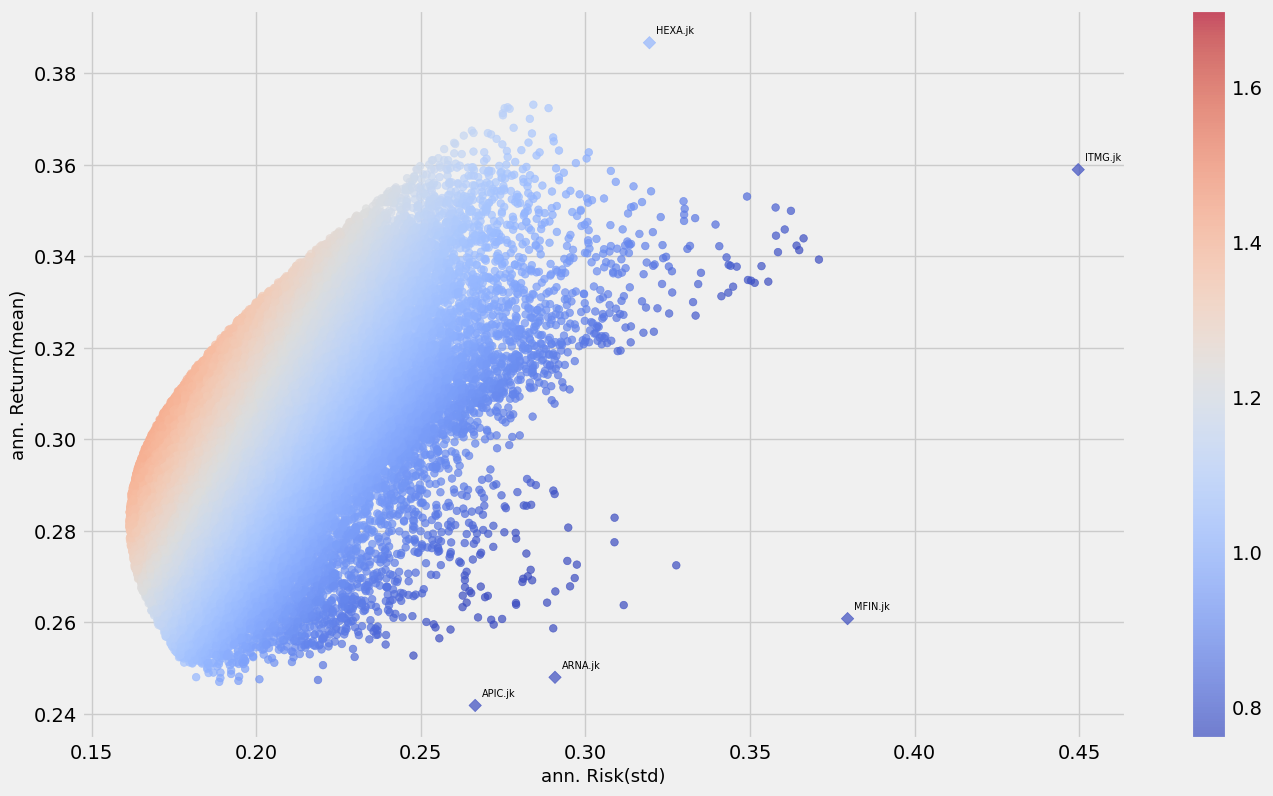

In [10]:
plt.figure(figsize = (15,9))
plt.scatter(summary.loc[:, "risk"], summary.loc[:, "return"], s = 30,
            c =summary.loc[:,'sharpe'],cmap ='coolwarm', vmin = 0.76, vmax = 1.7, alpha = 0.7)
plt.colorbar()
plt.scatter(annual_ret.loc[:, "risk"], annual_ret.loc[:, "return"], s = 40, marker = "D",
            c =annual_ret.loc[:,'sharpe'],cmap ='coolwarm', vmin = 0.76, vmax = 1.7, alpha = 0.7)
for i in annual_ret.index:
    plt.annotate(i, xy = ((annual_ret.loc[i, 'risk'] + 0.002, annual_ret.loc[i, 'return'] + 0.002)), size = 7)
plt.xlabel('ann. Risk(std)', fontsize = 13)
plt.ylabel('ann. Return(mean)', fontsize = 13)
plt.show()

## Finding the Optimum Porfolio - The Max Sharpe Ratio

### Checking 100K Random Porfolios

In [11]:
summary.head()

,return,risk,sharpe
0,0.293986,0.194601,1.184402
1,0.295968,0.172719,1.345935
2,0.296358,0.179347,1.298364
3,0.299828,0.211441,1.117701
4,0.296983,0.172826,1.350977


In [12]:
summary.describe()

,return,risk,sharpe
count,100000.000000,100000.000000,100000.000000
mean,0.299181,0.195520,1.214381
std,0.017286,0.022003,0.108607
min,0.247027,0.161422,0.637898
25%,0.287765,0.179442,1.144783
50%,0.299184,0.191431,1.229046
75%,0.310334,0.206850,1.297950
max,0.373127,0.370956,1.411907


### Finding Portfolio Index With The Highest Sharpe Ratio

In [13]:
msrp = summary['sharpe'].idxmax()
msrp

68705

In [14]:
msrp_summary = summary.iloc[msrp, :]
msrp_summary

return    0.300979
risk      0.168197
sharpe    1.411907
Name: 68705, dtype: float64

### Weight of The Portfoluo With The Highest Sharpe Ratio

In [15]:
msrp_weight = norm_port[msrp,:]
msrp_weight

array([0.07698708, 0.24138529, 0.31807487, 0.1407478 , 0.22280495])

#### Weight of Each Portfolios

In [16]:
weight =  pd.Series(index = port.columns, data = msrp_weight).sort_values(ascending = False)

# Appendix

## Optimization portfolio

Method Might not work on some portfolios 

In [17]:
import scipy.optimize as sco

In [18]:
ret.head() #stocks daily return on the selected period

,ITMG.jk,APIC.jk,HEXA.jk,MFIN.jk,ARNA.jk
Date,,,,,
2019-04-02,0.003145,0.009009,0.013115,0.033333,0.000000
2019-04-03,0.000000,0.000000,0.000000,0.000000,0.000000
2019-04-04,-0.045932,-0.017857,0.000000,-0.013825,-0.009804
2019-04-05,-0.023952,0.045455,0.022654,0.000000,0.009901
2019-04-08,-0.038037,-0.008696,0.000000,0.009346,-0.019608


In [19]:
noa = len(ret.columns)
noa # number of assests

5

## Calculation of weights

In [20]:
#calculate annualized portfolio return (based on weights)
def port_ret(weights):
    return ret.dot(weights.T).mean() * 250

In [21]:
#calculate annualized portfolio volatility (based on weights)
def port_vol(weights):
    return ret.dot(weights.T).std() * np.sqrt(250)

In [22]:
#define function to be minimized (sco only supports minimize, not maximize)
#-> maximize sharpe ratio == minimize sharpe ratio * (-1)
def min_func_sharpe(weights):
    port_return = port_ret(weights)
    port_volatility = port_vol(weights)
    sharpe_ratio = (port_return - rf[0]) / port_volatility
    return -1 * sharpe_ratio

### Optimization Calculation 

In [23]:
eweights = np.full(noa , 1/noa)
eweights

array([0.2, 0.2, 0.2, 0.2, 0.2])

In [24]:
#constraint: weights must sum up to 1 -> sum of weights - 1 = 0
cons = ({"type": "eq", "fun": lambda x: np.sum(x) - 1})

In [25]:
#bounds: all weights shall be between 0 and 1 -> can be changed
bnds =  tuple((0,1) for x in range(noa))

In [26]:
opts = sco.minimize(min_func_sharpe, eweights, method = "SLSQP", bounds = bnds, constraints= cons)
opts

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -1.4126375326968752
       x: [ 8.423e-02  2.285e-01  3.174e-01  1.368e-01  2.330e-01]
     nit: 6
     jac: [-3.747e-01 -3.770e-01 -3.764e-01 -3.769e-01 -3.768e-01]
    nfev: 41
    njev: 6

In [27]:
optimum_weight = opts['x']
optimum_weight

array([0.08423294, 0.22852838, 0.31742461, 0.1367755 , 0.23303859])

In [28]:
port_ret(optimum_weight)

0.3017206042177322

In [29]:
port_vol(optimum_weight)

0.1686353354656688

In [30]:
-min_func_sharpe(optimum_weight)

1.4126375326968752

In [31]:
opt_weight = pd.Series(index = ret.columns, data = optimum_weight)
opt_weight

ITMG.jk    0.084233
APIC.jk    0.228528
HEXA.jk    0.317425
MFIN.jk    0.136775
ARNA.jk    0.233039
dtype: float64